In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size': 11})

## First order bending

In [3]:
df1 = pd.read_csv(r'..\First_order_bending\sliced_right_circular_first_order_bending_displacement.csv', skiprows = 8)
df1.rename(columns={'% X': 'X (mm)', 'Y': 'Y (mm)', 'Z': 'Z (mm)'}, inplace = True)
df1 = df1.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df1.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df1.reset_index(drop = True, inplace = True)
df1

X (mm)  Y (mm)  Z (mm)    w (mm)
0          0.0     0.0     0.0  0.000000
1          0.0     0.0     0.1  0.000000
2          0.0     0.0     0.2  0.000000
3          0.0     0.0     0.3  0.000000
4          0.0     0.0     0.4  0.000000
...        ...     ...     ...       ...
170555    41.5     4.0     0.5 -1.607166
170556    41.5     4.0     0.6 -1.607130
170557    41.5     4.0     0.7 -1.607099
170558    41.5     4.0     0.8 -1.607073
170559    41.5     4.0     0.9 -1.607054

[170560 rows x 4 columns]

In [4]:
df2 = pd.read_csv(r'..\First_order_bending\sliced_right_circular_first_order_bending_stress.csv', skiprows = 4)
df2.rename(columns={'% Max von Mises stress (N/m^2)': 'Max von Mises stress (N/m^2)'}, inplace = True)
df2['Flexure length (mm)'] = 1.5
df2['Applied force (N)'] = 1.0
df2

Max von Mises stress (N/m^2)  Flexure length (mm)  Applied force (N)
0                  1.533761e+08                  1.5                1.0

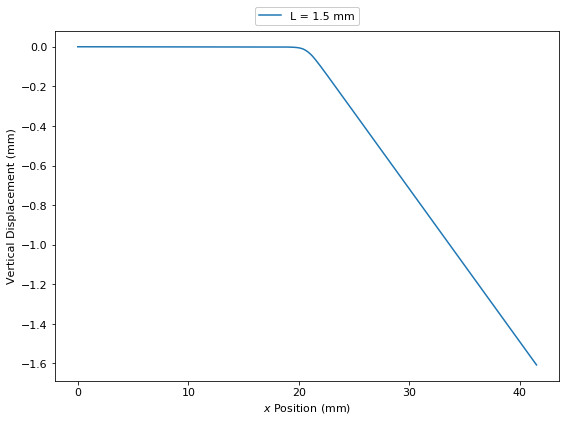

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

x_lim = 20.0 + df2['Flexure length (mm)'].iloc[0]
df_process = df1.copy()
df_process = df_process[df_process['Z (mm)'] <= 0.8]
df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
df_process = df_process.groupby(['X (mm)']).mean()
df_process.reset_index(inplace = True)
coe = np.polyfit(df_process[df_process['X (mm)'] >= x_lim]['X (mm)'], df_process[df_process['X (mm)'] >= x_lim]['w (mm)'], 1)
gradient = np.abs(coe[0])
pivot = -coe[1] / coe[0]
ax.plot(df_process['X (mm)'], df_process['w (mm)'], '-', label = 'L = {:.1f} mm'.format(df2['Flexure length (mm)'].iloc[0]))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, 1), framealpha = 1)

plt.tight_layout()
plt.show()

In [6]:
df2['X rotation pivot (mm)'] = pivot
df2['Torque (Nm)'] = df2['Applied force (N)'] * (df2['Flexure length (mm)'] + 40.0 - pivot) * 0.001
df2['Deflection angle (°)'] = np.arctan(gradient) * 180.0 / np.pi
df2['1st order stiffness (Nm/°)'] = df2['Torque (Nm)'] / df2['Deflection angle (°)']
df2['Normalised 1st order stress (N/m^2°)'] = df2['Max von Mises stress (N/m^2)'] / df2['Deflection angle (°)']
df2

Max von Mises stress (N/m^2)  Flexure length (mm)  Applied force (N)  \
0                  1.533761e+08                  1.5                1.0   

   X rotation pivot (mm)  Torque (Nm)  Deflection angle (°)  \
0              20.699268     0.020801              4.416879   

   1st order stiffness (Nm/°)  Normalised 1st order stress (N/m^2°)  
0                    0.004709                          3.472500e+07

## Second order bending

In [7]:
df3 = pd.read_csv(r'..\Second_order_bending\sliced_right_circular_second_order_bending_displacement.csv', skiprows = 8)
df3.rename(columns={'% X': 'X (mm)', 'Y': 'Y (mm)', 'Z': 'Z (mm)'}, inplace = True)
df3 = df3.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df3.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df3.reset_index(drop = True, inplace = True)
df3

X (mm)  Y (mm)  Z (mm)    w (mm)
0          0.0     0.0     0.0  0.000000
1          0.0     0.0     0.1  0.000000
2          0.0     0.0     0.2  0.000000
3          0.0     0.0     0.3  0.000000
4          0.0     0.0     0.4  0.000000
...        ...     ...     ...       ...
170555    41.5     4.0     0.5 -0.156998
170556    41.5     4.0     0.6 -0.156078
170557    41.5     4.0     0.7 -0.155316
170558    41.5     4.0     0.8 -0.154713
170559    41.5     4.0     0.9 -0.154263

[170560 rows x 4 columns]

In [8]:
df4 = pd.read_csv(r'..\Second_order_bending\sliced_right_circular_second_order_bending_stress.csv', skiprows = 4)
df4.rename(columns={'% Max von Mises stress (N/m^2)': 'Max von Mises stress (N/m^2)'}, inplace = True)
df4['Flexure length (mm)'] = 1.5
df4['Applied force (N)'] = 35.0
df4

Max von Mises stress (N/m^2)  Flexure length (mm)  Applied force (N)
0                  1.423059e+08                  1.5               35.0

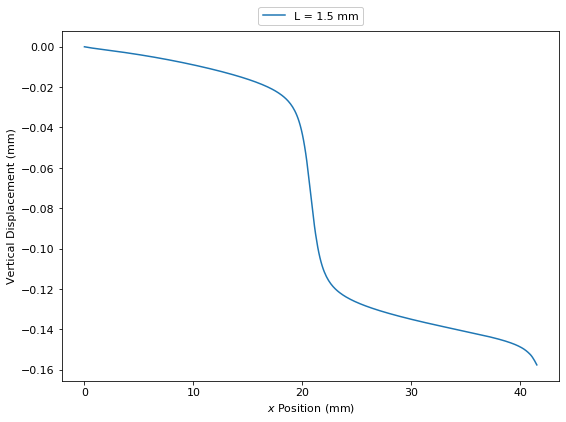

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

x_lim = 20.0 + df4['Flexure length (mm)'].iloc[0]
df_process = df3.copy()
df_process = df_process[df_process['Z (mm)'] <= 0.8]
df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
df_process = df_process.groupby(['X (mm)']).mean()
df_process.reset_index(inplace = True)
displacement = (df_process[df_process['X (mm)'] == 20.0]['w (mm)'].values[0] - df_process[df_process['X (mm)'] == x_lim]['w (mm)'].values[0]) * 0.001
ax.plot(df_process['X (mm)'], df_process['w (mm)'], '-', label = 'L = {:.1f} mm'.format(df4['Flexure length (mm)'].iloc[0]))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, 1), framealpha = 1)

plt.tight_layout()
plt.show()

In [10]:
df4['Displacement (m)'] = displacement
df4['2nd order stiffness (N/m)'] = df4['Applied force (N)'] / df4['Displacement (m)']
df4['Normalised 2nd order stress (N/m^3)'] = df4['Max von Mises stress (N/m^2)'] / df4['Displacement (m)']
df4

Max von Mises stress (N/m^2)  Flexure length (mm)  Applied force (N)  \
0                  1.423059e+08                  1.5               35.0   

   Displacement (m)  2nd order stiffness (N/m)  \
0          0.000058              599273.668801   

   Normalised 2nd order stress (N/m^3)  
0                         2.436576e+12

## Data export

In [11]:
df5 = df2[['Flexure length (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df5['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df5['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df5['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df5.to_csv('sliced_right_circular.csv', index = False)